Data Description :
    
The Mushroom Dataset contains information about  species of gilled mushrooms and we have to classify whether the mushroom 
is edible or poisonous. In class column p represents poisonous and e represents edible

## Importing Libraries for classification problem

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


import warnings
warnings.filterwarnings('ignore')

### Loading Datasets

In [2]:
df=pd.read_csv('mushroom.csv')

In [3]:

df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
df.shape

(8124, 23)

In [7]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=df.columns
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [17]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [18]:
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


observation


1) as there is minimal difference between the 75% and max values it means there are alot less chances of Outliers

2) as there is remarkable less difference between mean and std deviation so data is less skewed

In [20]:
#Checking Null Values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

NO null values are present

In [21]:
#Checking the correlation
dfcor=df.corr()

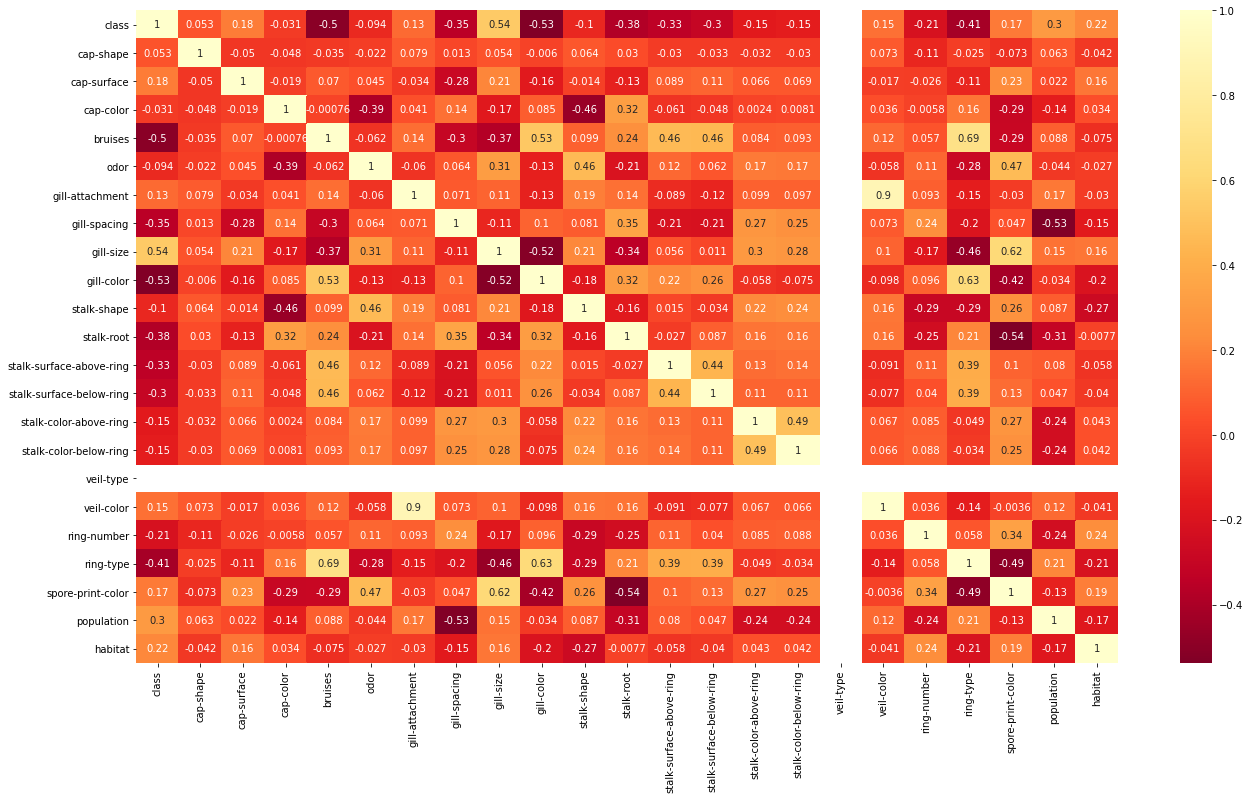

In [22]:
plt.figure(figsize=(22,12))
sns.heatmap(dfcor,cmap="YlOrRd_r",annot=True)

observation:
    
1)in Veli type there is only single value 'zero' so it is representing as white

2)class is highly correlated with gill-size and negatively correlated with gill-color and ring-type

class                 AxesSubplot(0.125,0.125;0.065678x0.755)
cap-shape          AxesSubplot(0.203814,0.125;0.065678x0.755)
cap-surface        AxesSubplot(0.282627,0.125;0.065678x0.755)
cap-color          AxesSubplot(0.361441,0.125;0.065678x0.755)
bruises            AxesSubplot(0.440254,0.125;0.065678x0.755)
odor               AxesSubplot(0.519068,0.125;0.065678x0.755)
gill-attachment    AxesSubplot(0.597881,0.125;0.065678x0.755)
gill-spacing       AxesSubplot(0.676695,0.125;0.065678x0.755)
gill-size          AxesSubplot(0.755508,0.125;0.065678x0.755)
gill-color         AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

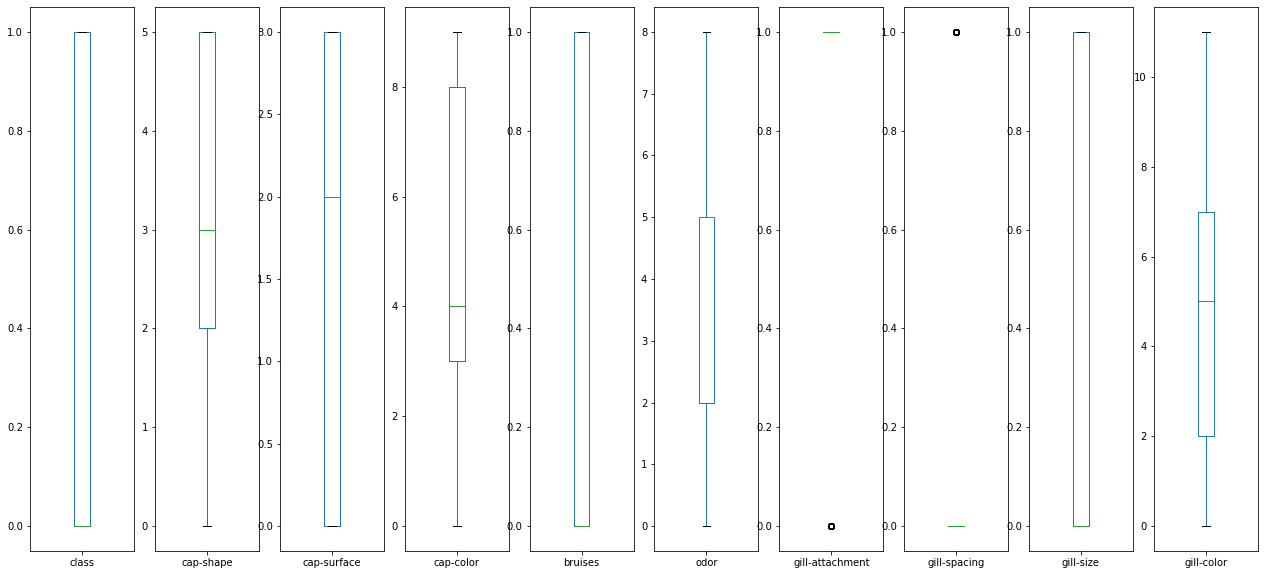

In [28]:
#checking outliers
df.iloc[:,0:10].plot(kind="box",subplots=True,legend=False,figsize=(22,10))

stalk-root                     AxesSubplot(0.125,0.125;0.0545775x0.755)
stalk-surface-above-ring    AxesSubplot(0.190493,0.125;0.0545775x0.755)
stalk-surface-below-ring    AxesSubplot(0.255986,0.125;0.0545775x0.755)
stalk-color-above-ring      AxesSubplot(0.321479,0.125;0.0545775x0.755)
stalk-color-below-ring      AxesSubplot(0.386972,0.125;0.0545775x0.755)
veil-type                   AxesSubplot(0.452465,0.125;0.0545775x0.755)
veil-color                  AxesSubplot(0.517958,0.125;0.0545775x0.755)
ring-number                 AxesSubplot(0.583451,0.125;0.0545775x0.755)
ring-type                   AxesSubplot(0.648944,0.125;0.0545775x0.755)
spore-print-color           AxesSubplot(0.714437,0.125;0.0545775x0.755)
population                   AxesSubplot(0.77993,0.125;0.0545775x0.755)
habitat                     AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

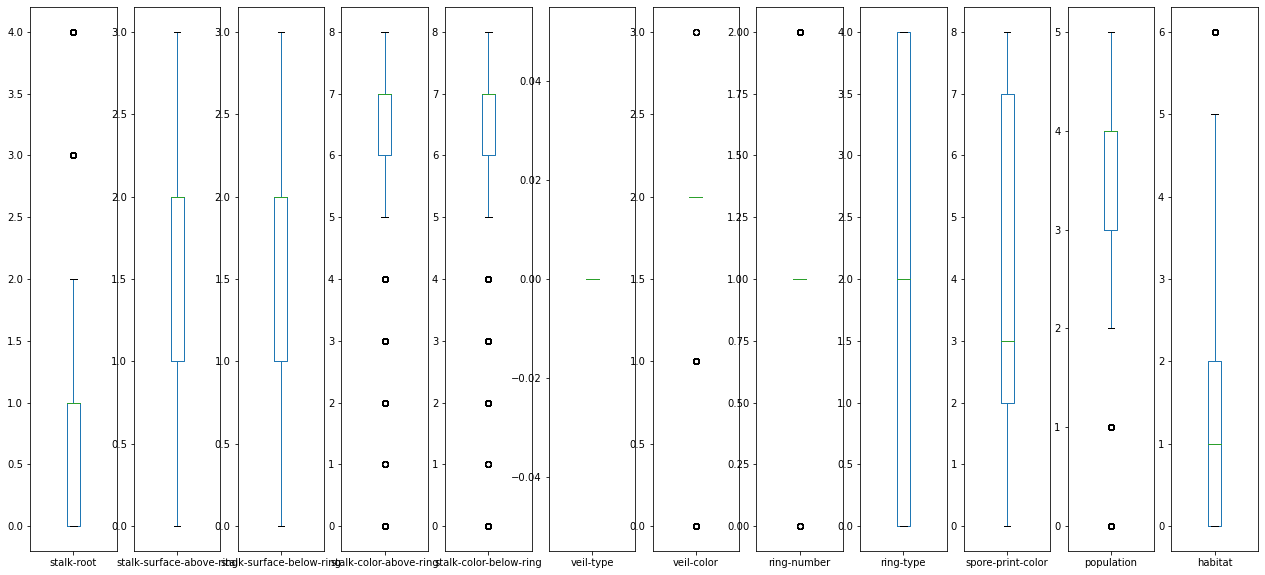

In [29]:
df.iloc[:,11:].plot(kind="box",subplots=True,legend=False,figsize=(22,10))


very minimal outliers are present

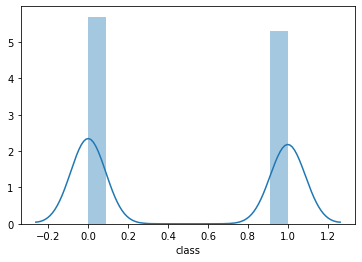

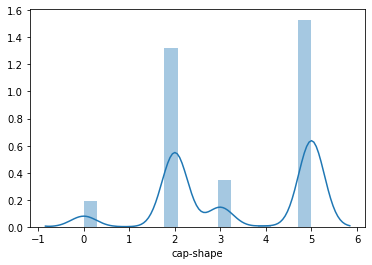

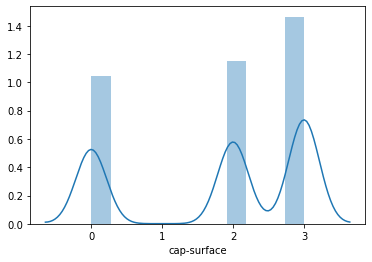

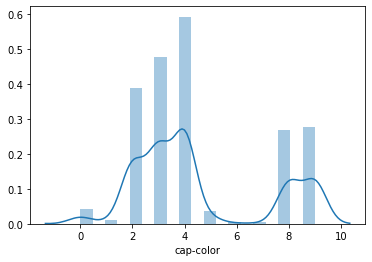

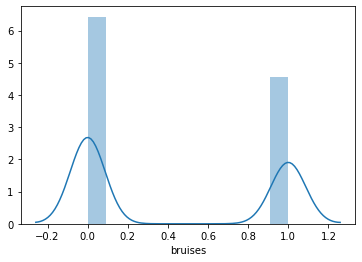

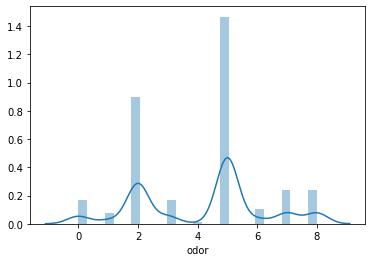

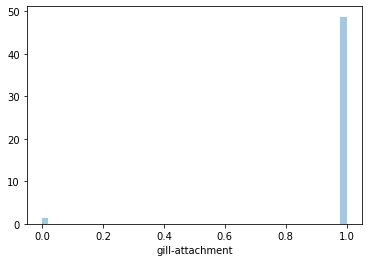

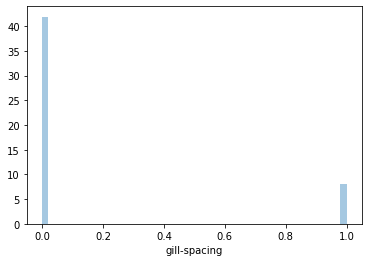

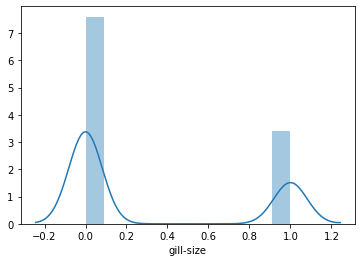

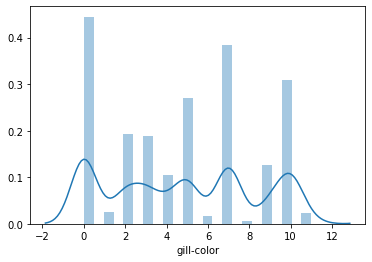

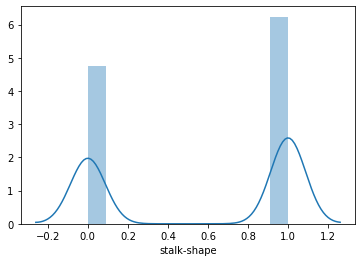

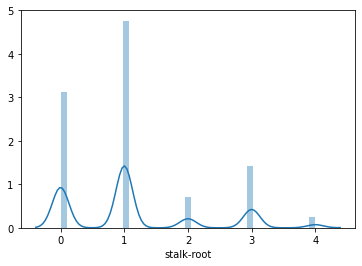

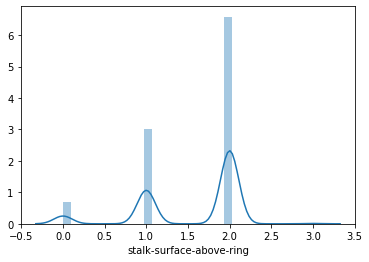

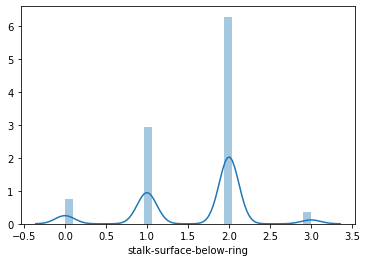

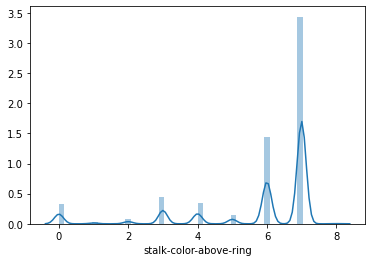

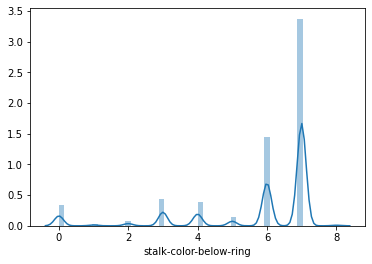

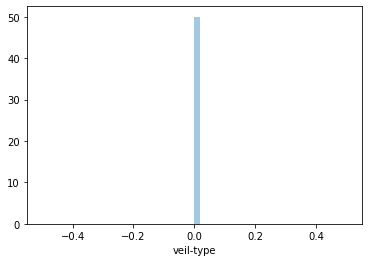

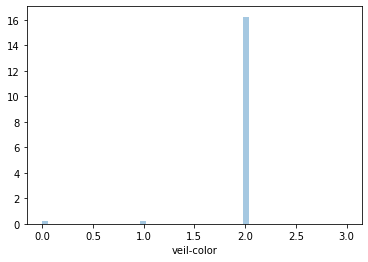

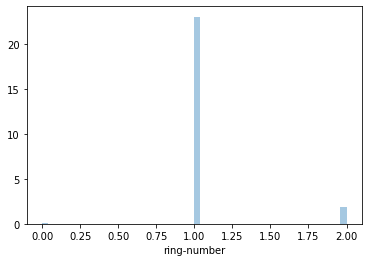

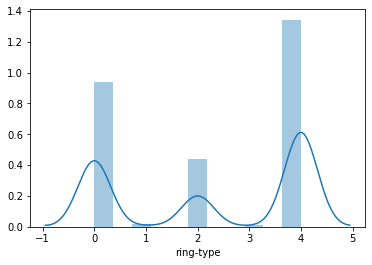

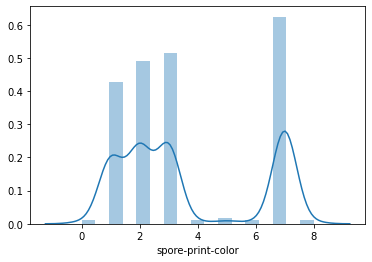

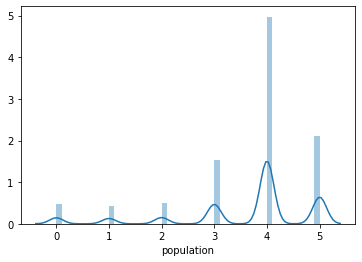

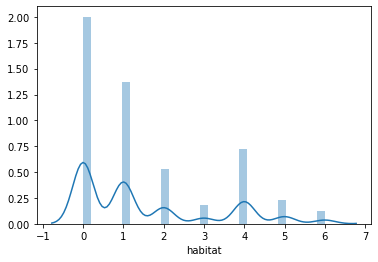

In [31]:
#checking skewness
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

by observing the distplot conclusion can be drawn that there is no skewness present

In [33]:
#checking skewness by skew score
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

####  splitting the data in X and Y

In [54]:
x=df.iloc[:,1:]
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [56]:
y=df.iloc[:,0]
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

## Finding the best Random-State



In [67]:
maxAccuracy=0
maxRandomState=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    accuracy=accuracy_score(y_test,predlg)
    if accuracy > maxAccuracy:
        maxAccuracy= accuracy
        maxRandomState =i
print("MaxAccuracy score is ",maxAccuracy,"and best random state is ",maxRandomState)

MaxAccuracy score is  0.964765100671141 and best random state is  21


We have found the best random state at 21

In [68]:
# creating Train_Test_Split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=21)

In [70]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.964765100671141
[[889  35]
 [ 28 836]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       924
           1       0.96      0.97      0.96       864

    accuracy                           0.96      1788
   macro avg       0.96      0.96      0.96      1788
weighted avg       0.96      0.96      0.96      1788



In [74]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[924   0]
 [  0 864]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       864

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [75]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

1.0
[[924   0]
 [  0 864]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       864

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [76]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9893736017897091
[[920   4]
 [ 15 849]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       924
           1       1.00      0.98      0.99       864

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



Here DecisionTreeClassifier and RandomForestClassifier are showing the highest accuracy of 1.0

so lets recheck it with cross_validation

In [81]:
cvs=cross_val_score(lg,x,y,cv=10)
print("cross validation score of Logistic Regression Model is ",cvs.mean())
print('\n \n')

cvs=cross_val_score(dtc,x,y,cv=10)
print("cross validation score of DecisionTreeClassifier Model is ",cvs.mean())
print('\n \n')

cvs=cross_val_score(rfc,x,y,cv=10)
print("cross validation score of RandomForestClassifier Model is ",cvs.mean())
print('\n \n')

cvs=cross_val_score(svc,x,y,cv=10)
print("cross validation score of Support Vector Classifier Model is ",cvs.mean())
print('\n \n')

cross validation score of Logistic Regression Model is  0.8792500560473584

 

cross validation score of DecisionTreeClassifier Model is  0.9611225225552747

 

cross validation score of RandomForestClassifier Model is  0.9670338526045359

 

cross validation score of Support Vector Classifier Model is  0.9171607922975781

 



'''

MODEL                         ACCURACY            CROSS_VAL_SCORE             DIFFERENCE

Logistic                         .96                  .87                        .9

DecisionTree                     1.0                  .96                        .4

RandomForest                     1.0                  .97                        .3

SVC                              .98                  .91                        .7

'''

so  there is less  difference between accuracy_score and Cross_val_score in RandomForestClassifier

so randomForestClassifier is the best model

### Hyper Parameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV

parameters ={'max_depth': np.arange(2,15),
            'criterion':['gini','entropy']}

In [84]:
rfcgscv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [85]:
rfcgscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [86]:
rfcgscv.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [87]:
rfgs_pred=rfcgscv.best_estimator_.predict(x_test)

In [88]:
accuracy_score(y_test,rfgs_pred)

1.0

In [90]:
import joblib
joblib.dump(rfcgscv.best_estimator_,'Mushroom_RFC.pkl')

['Mushroom_RFC.pkl']